In [ ]:
import pandas as pd 
import numpy as np
import datetime as datetime

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-03-16/games.csv')

In [ ]:
df.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Dota 2,2021,February,404832.13,-27839.52,651615,62.1275%
2,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,February,198957.52,-2289.67,447390,44.4707%
3,Apex Legends,2021,February,120982.64,49215.90,196799,61.4752%
4,Rust,2021,February,117742.27,-24374.98,224276,52.4988%


In [ ]:
#check for missing values 
df.isnull().values.any()

True

## Missing values
The dataset has some missing values. Let's check where they are. 

In [ ]:
df.isnull().sum(axis=0) #check which columns have null values 

gamename            0
year                0
month               0
avg                 0
gain             1258
peak                0
avg_peak_perc       0
dtype: int64

## Feature generation

Creating new column: 
* Date from year and month

In [ ]:
# Adding each column (converted to string) works
df['datetime'] = pd.to_datetime(df['year'].astype(str) 
                                + df['month'].astype(str) + '1', 
                                format='%Y%B%d')

In [ ]:
df.head(30)

,gamename,year,month,avg,gain,peak,avg_peak_perc,date_num,datetime
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,1900-02-01,2021-02-01
1,Dota 2,2021,February,404832.13,-27839.52,651615,62.1275%,1900-02-01,2021-02-01
2,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,February,198957.52,-2289.67,447390,44.4707%,1900-02-01,2021-02-01
3,Apex Legends,2021,February,120982.64,49215.90,196799,61.4752%,1900-02-01,2021-02-01
4,Rust,2021,February,117742.27,-24374.98,224276,52.4988%,1900-02-01,2021-02-01
5,Team Fortress 2,2021,February,101230.91,18082.74,133620,75.7603%,1900-02-01,2021-02-01
6,Grand Theft Auto V,2021,February,90647.64,-10602.95,146438,61.9017%,1900-02-01,2021-02-01
7,Tom Clancy's Rainbow Six Siege,2021,February,72382.76,-5334.66,113338,63.8645%,1900-02-01,2021-02-01
8,Rocket League,2021,February,53723.01,-5726.15,103429,51.9419%,1900-02-01,2021-02-01
9,Path of Exile,2021,February,46919.90,-765.71,90539,51.8229%,1900-02-01,2021-02-01


In [ ]:
from plotnine import *

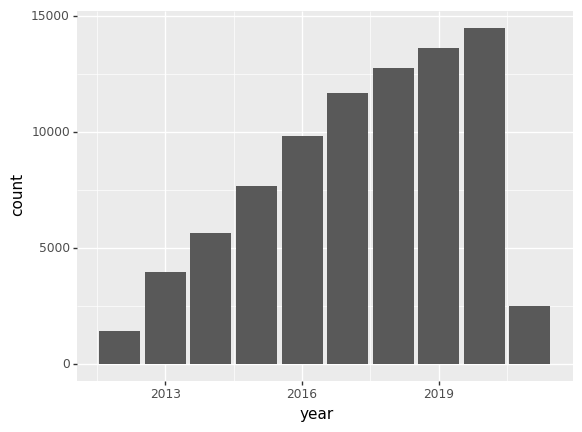

<ggplot: (8732248646605)>

In [ ]:
(ggplot(df)
  +  aes( x = 'year')
  +  geom_bar()
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


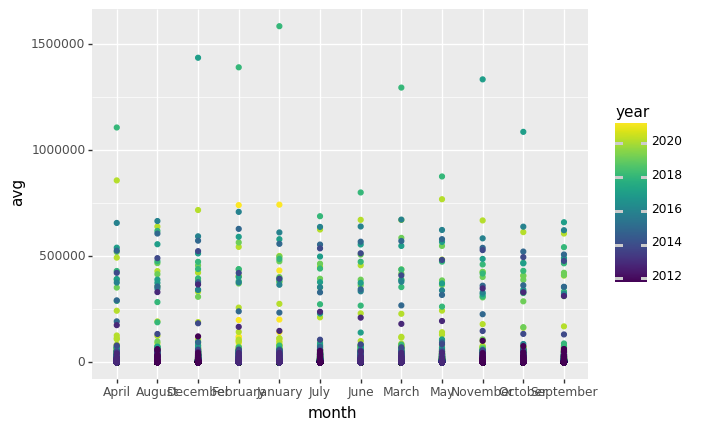

<ggplot: (8732239314601)>

In [ ]:
(ggplot(df)
  +  aes( x = 'month', y = 'avg', colour = 'year')
  +  geom_point()
)

In [ ]:
df1 = (df.groupby(['datetime','year','month'])['avg'].median().to_frame('median').reset_index().sort_values(by = 'datetime'))# group by to create a df 

In [ ]:
df1

,datetime,year,month,median
0,2012-07-01,2012,July,362.940
1,2012-08-01,2012,August,220.425
2,2012-09-01,2012,September,175.820
3,2012-10-01,2012,October,157.710
4,2012-11-01,2012,November,172.215
...,...,...,...,...
99,2020-10-01,2020,October,233.895
100,2020-11-01,2020,November,267.825
101,2020-12-01,2020,December,291.145
102,2021-01-01,2021,January,325.730


In [ ]:
months = ("January", "February", "March", "April", "May", "June", "July" , "August", "September", "October", "November", "December")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


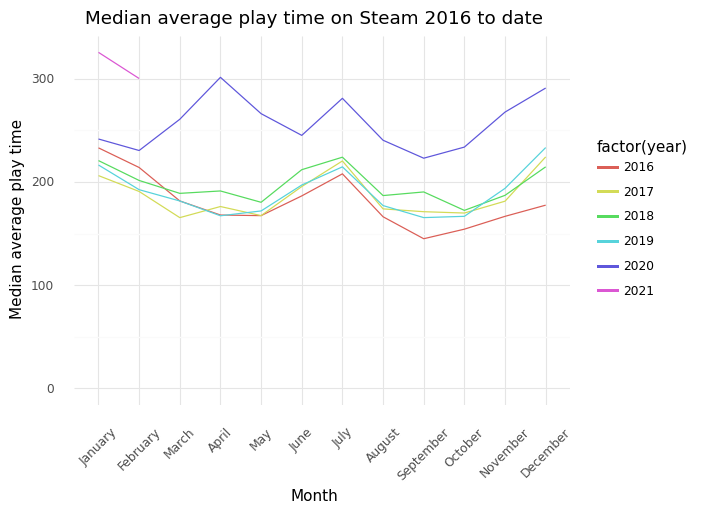

<ggplot: (8732238024753)>

In [ ]:
(ggplot(df1[df1['year']>= 2016])
       + aes(x= 'month' ,y= 'median', colour = 'factor(year)', group = 'year') ###by adding factor you convert continuous to categorical 
       + geom_line()
       + scale_x_discrete(limits = months) # to quickly reorder a discrete axis without changing the data is to change it's limits)
       + theme_minimal()
       + theme(axis_text_x=element_text(angle=45)) # rotate x-axis text for readability
       + labs(x = 'Month', y = 'Median average play time' , title = "Median average play time on Steam 2016 to date")
       + expand_limits( y = 0)
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 4 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


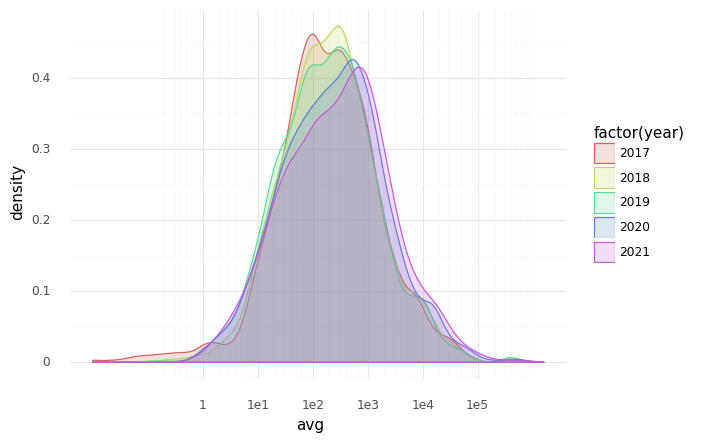

<ggplot: (8732238557757)>

In [ ]:
(ggplot(df[df['year']>2016])
       + aes(x= 'avg',colour = 'factor(year)', fill = 'factor(year)')
       #, group = 'year') ###by adding factor you convert continuous to categorical 
       + geom_density(alpha = 0.2)
       #+ scale_x_discrete(limits = months) # to quickly reorder a discrete axis without changing the data is to change it's limits)
       + theme_minimal()
       + scale_x_log10(breaks = [1, 10, 100, 1000, 10000, 100000]) # adding log scale 
       #+ theme(axis_text_x=element_text(angle=45)) # rotate x-axis text for readability
       #+ labs(x = 'Month', y = 'Median average play time' , title = "Median average play time on Steam 2016 to date")
       #+ expand_limits( y = 0)
)

In [ ]:
df2 = (df.groupby(['datetime','year','month','gamename'])['avg'].mean().to_frame('average_avg').reset_index().sort_values(by = 'datetime'))# group by to create a df 

In [ ]:
df2[['gamename','average_avg']].nlargest(10,'average_avg') # highest peak 

,gamename,average_avg
40874,PLAYERUNKNOWN'S BATTLEGROUNDS,1584886.77
39837,PLAYERUNKNOWN'S BATTLEGROUNDS,1436158.51
41920,PLAYERUNKNOWN'S BATTLEGROUNDS,1391015.30
38805,PLAYERUNKNOWN'S BATTLEGROUNDS,1334170.09
42974,PLAYERUNKNOWN'S BATTLEGROUNDS,1295408.59
44023,PLAYERUNKNOWN'S BATTLEGROUNDS,1107181.80
37783,PLAYERUNKNOWN'S BATTLEGROUNDS,1086638.87
45066,PLAYERUNKNOWN'S BATTLEGROUNDS,876180.64
70352,Counter-Strike: Global Offensive,857604.22
46116,PLAYERUNKNOWN'S BATTLEGROUNDS,800668.23


In [ ]:
df2['gamename'].nunique() ### count how many distinct values we have 

1258

In [ ]:
top_games = (pd.pivot_table(df[df['year'] > 2018], index = 'gamename' ,values = 'avg', aggfunc= np.max)
            .sort_values(by = 'avg', ascending = False)
            .nlargest(15,'avg')
            .reset_index())

top_games

,gamename,avg
0,Counter-Strike: Global Offensive,857604.22
1,Dota 2,586505.85
2,PLAYERUNKNOWN'S BATTLEGROUNDS,497803.25
3,Cyberpunk 2077,332395.65
4,Destiny 2,165307.82
5,Grand Theft Auto V,142724.48
6,Rust,142117.25
7,Terraria,129808.62
8,Fall Guys: Ultimate Knockout,124479.35
9,Apex Legends,120982.64


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


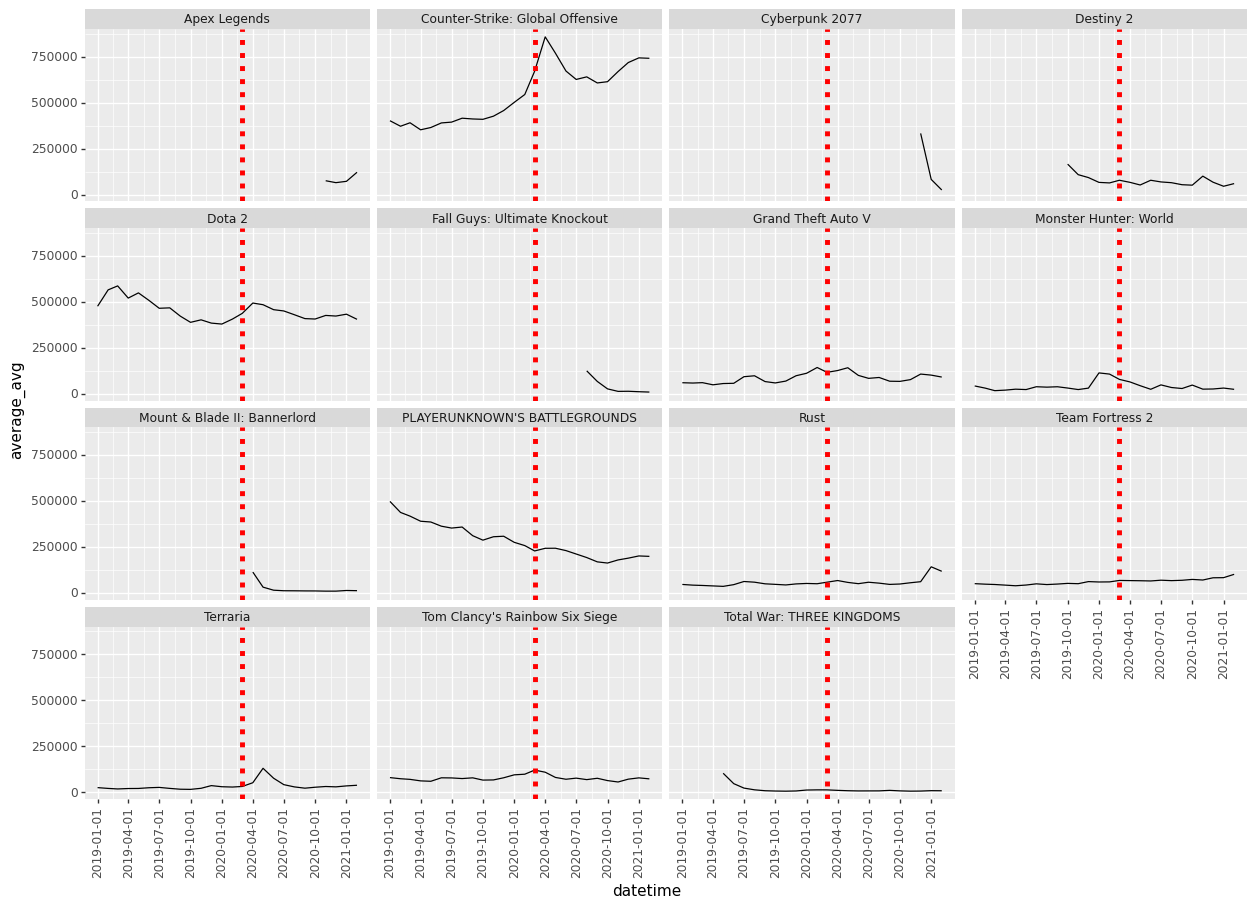

<ggplot: (8732194995477)>

In [ ]:
(ggplot(df2[(df2['year'] > 2018) & (df2['gamename'].isin(top_games['gamename']))])
  + aes(x = 'datetime', y = 'average_avg')
  + geom_line()
  + facet_wrap('~gamename')
  + theme(figure_size = (15, 10) , axis_text_x=element_text(angle=90))
  + geom_vline(xintercept = '2020-03-01', 
               colour='red',     # add colour
               size=2,           # set line thickness
               linetype='dotted')
  )

In [ ]:
df3 = df[df['year'] > 2018]
df3.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc,date_num,datetime
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%,1900-02-01,2021-02-01
1,Dota 2,2021,February,404832.13,-27839.52,651615,62.1275%,1900-02-01,2021-02-01
2,PLAYERUNKNOWN'S BATTLEGROUNDS,2021,February,198957.52,-2289.67,447390,44.4707%,1900-02-01,2021-02-01
3,Apex Legends,2021,February,120982.64,49215.90,196799,61.4752%,1900-02-01,2021-02-01
4,Rust,2021,February,117742.27,-24374.98,224276,52.4988%,1900-02-01,2021-02-01


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 4 rows containing missing values.
  data = self.position.setup_data(self.data, params)


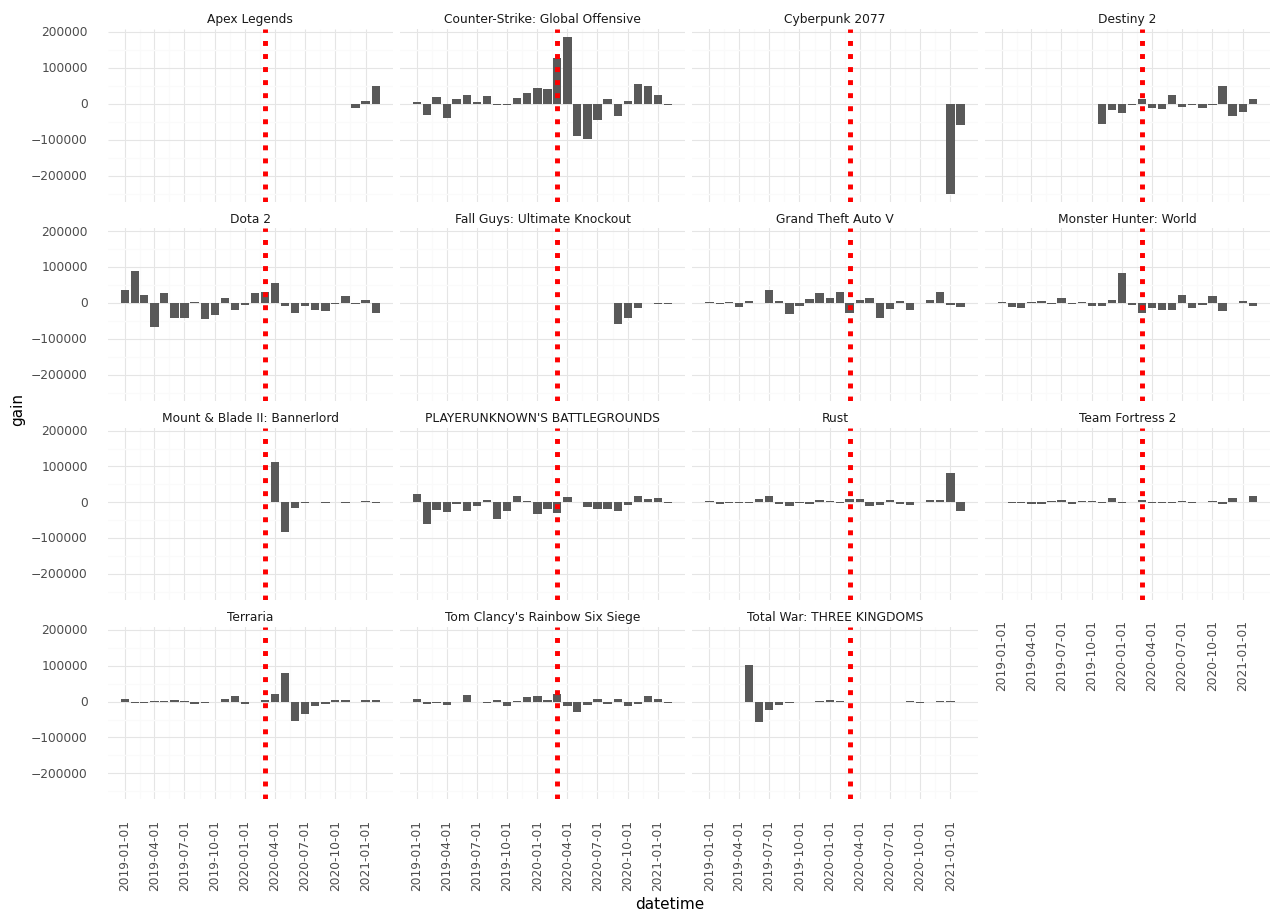

<ggplot: (8732193365577)>

In [ ]:
(ggplot(df3[df3['gamename'].isin(top_games['gamename'])])
  + aes(x = 'datetime', y = 'gain')
  + geom_bar(stat = 'identity')
  + facet_wrap('~gamename')
  + theme_minimal()
  + theme(figure_size = (15, 10) , axis_text_x=element_text(angle=90))
  + geom_vline(xintercept = '2020-03-01', 
               colour='red',     # add colour
               size=2,           # set line thickness
               linetype='dotted')
  )

In [ ]:
#reshape dataset from wide to long
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html


df4_gr =(df.groupby(['datetime','year','month'])['avg','peak'].median().reset_index().sort_values(by = 'datetime'))# group by to create a df 
df4 = pd.melt(df4_gr, id_vars=['datetime','year','month'], value_vars=['peak', 'avg'])
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,datetime,year,month,variable,value
0,2012-07-01,2012,July,peak,915.0
1,2012-08-01,2012,August,peak,479.0
2,2012-09-01,2012,September,peak,436.0
3,2012-10-01,2012,October,peak,427.0
4,2012-11-01,2012,November,peak,532.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


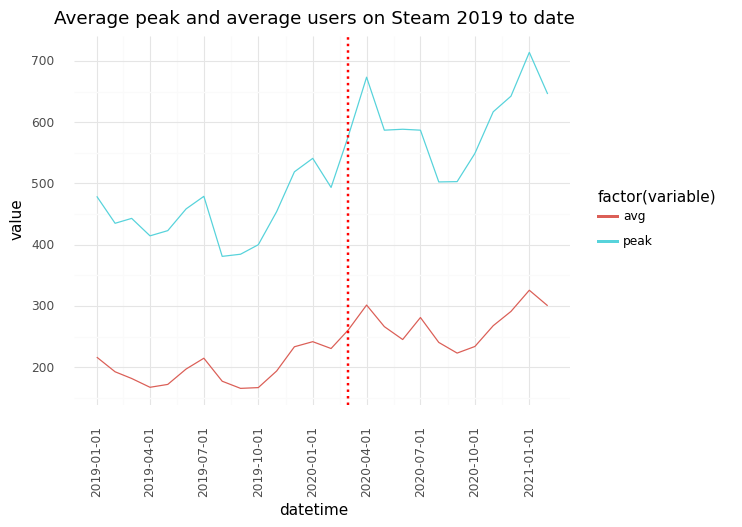

<ggplot: (8732192405681)>

In [ ]:
(ggplot(df4[df4['year']>2018]) 
  +aes(x = 'datetime', y = 'value' , colour = 'factor(variable)' , group = 'variable')
  +geom_line()
  + theme_minimal()
  + theme(axis_text_x=element_text(angle=90))
  + geom_vline(xintercept = '2020-03-01', 
               colour='red',     # add colour
               size=1,           # set line thickness
               linetype='dotted')
  + labs(title = 'Average peak and average users on Steam 2019 to date')
  )

In [ ]:
df.dtypes

gamename                       object
year                            int64
month                          object
avg                           float64
gain                          float64
peak                            int64
avg_peak_perc                  object
date_num               datetime64[ns]
datetime               datetime64[ns]
avg_peak_percentage           float64
dtype: object

In [ ]:
df['avg_peak_percentage'] = df['avg_peak_perc'].apply(lambda x: x.strip('%')).astype('float')
#need to convert the percentage column to float t use it as size 

In [ ]:
(
    (ggplot(df[df['year']>2018])) 
    + aes(x = 'peak' , y = 'avg', colour = 'factor(year)')
    + geom_point(size = 'avg_peak_percentage')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


TypeError: ignored